In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

Now we move on to analyse the blitz dataset for highly ranked players.

In [2]:
chessdata = pd.read_csv('rapidMidRatingData.csv')
chessdata['Opening_new'].describe()


count                22417
unique                  90
top       Sicilian Defense
freq                  3156
Name: Opening_new, dtype: object

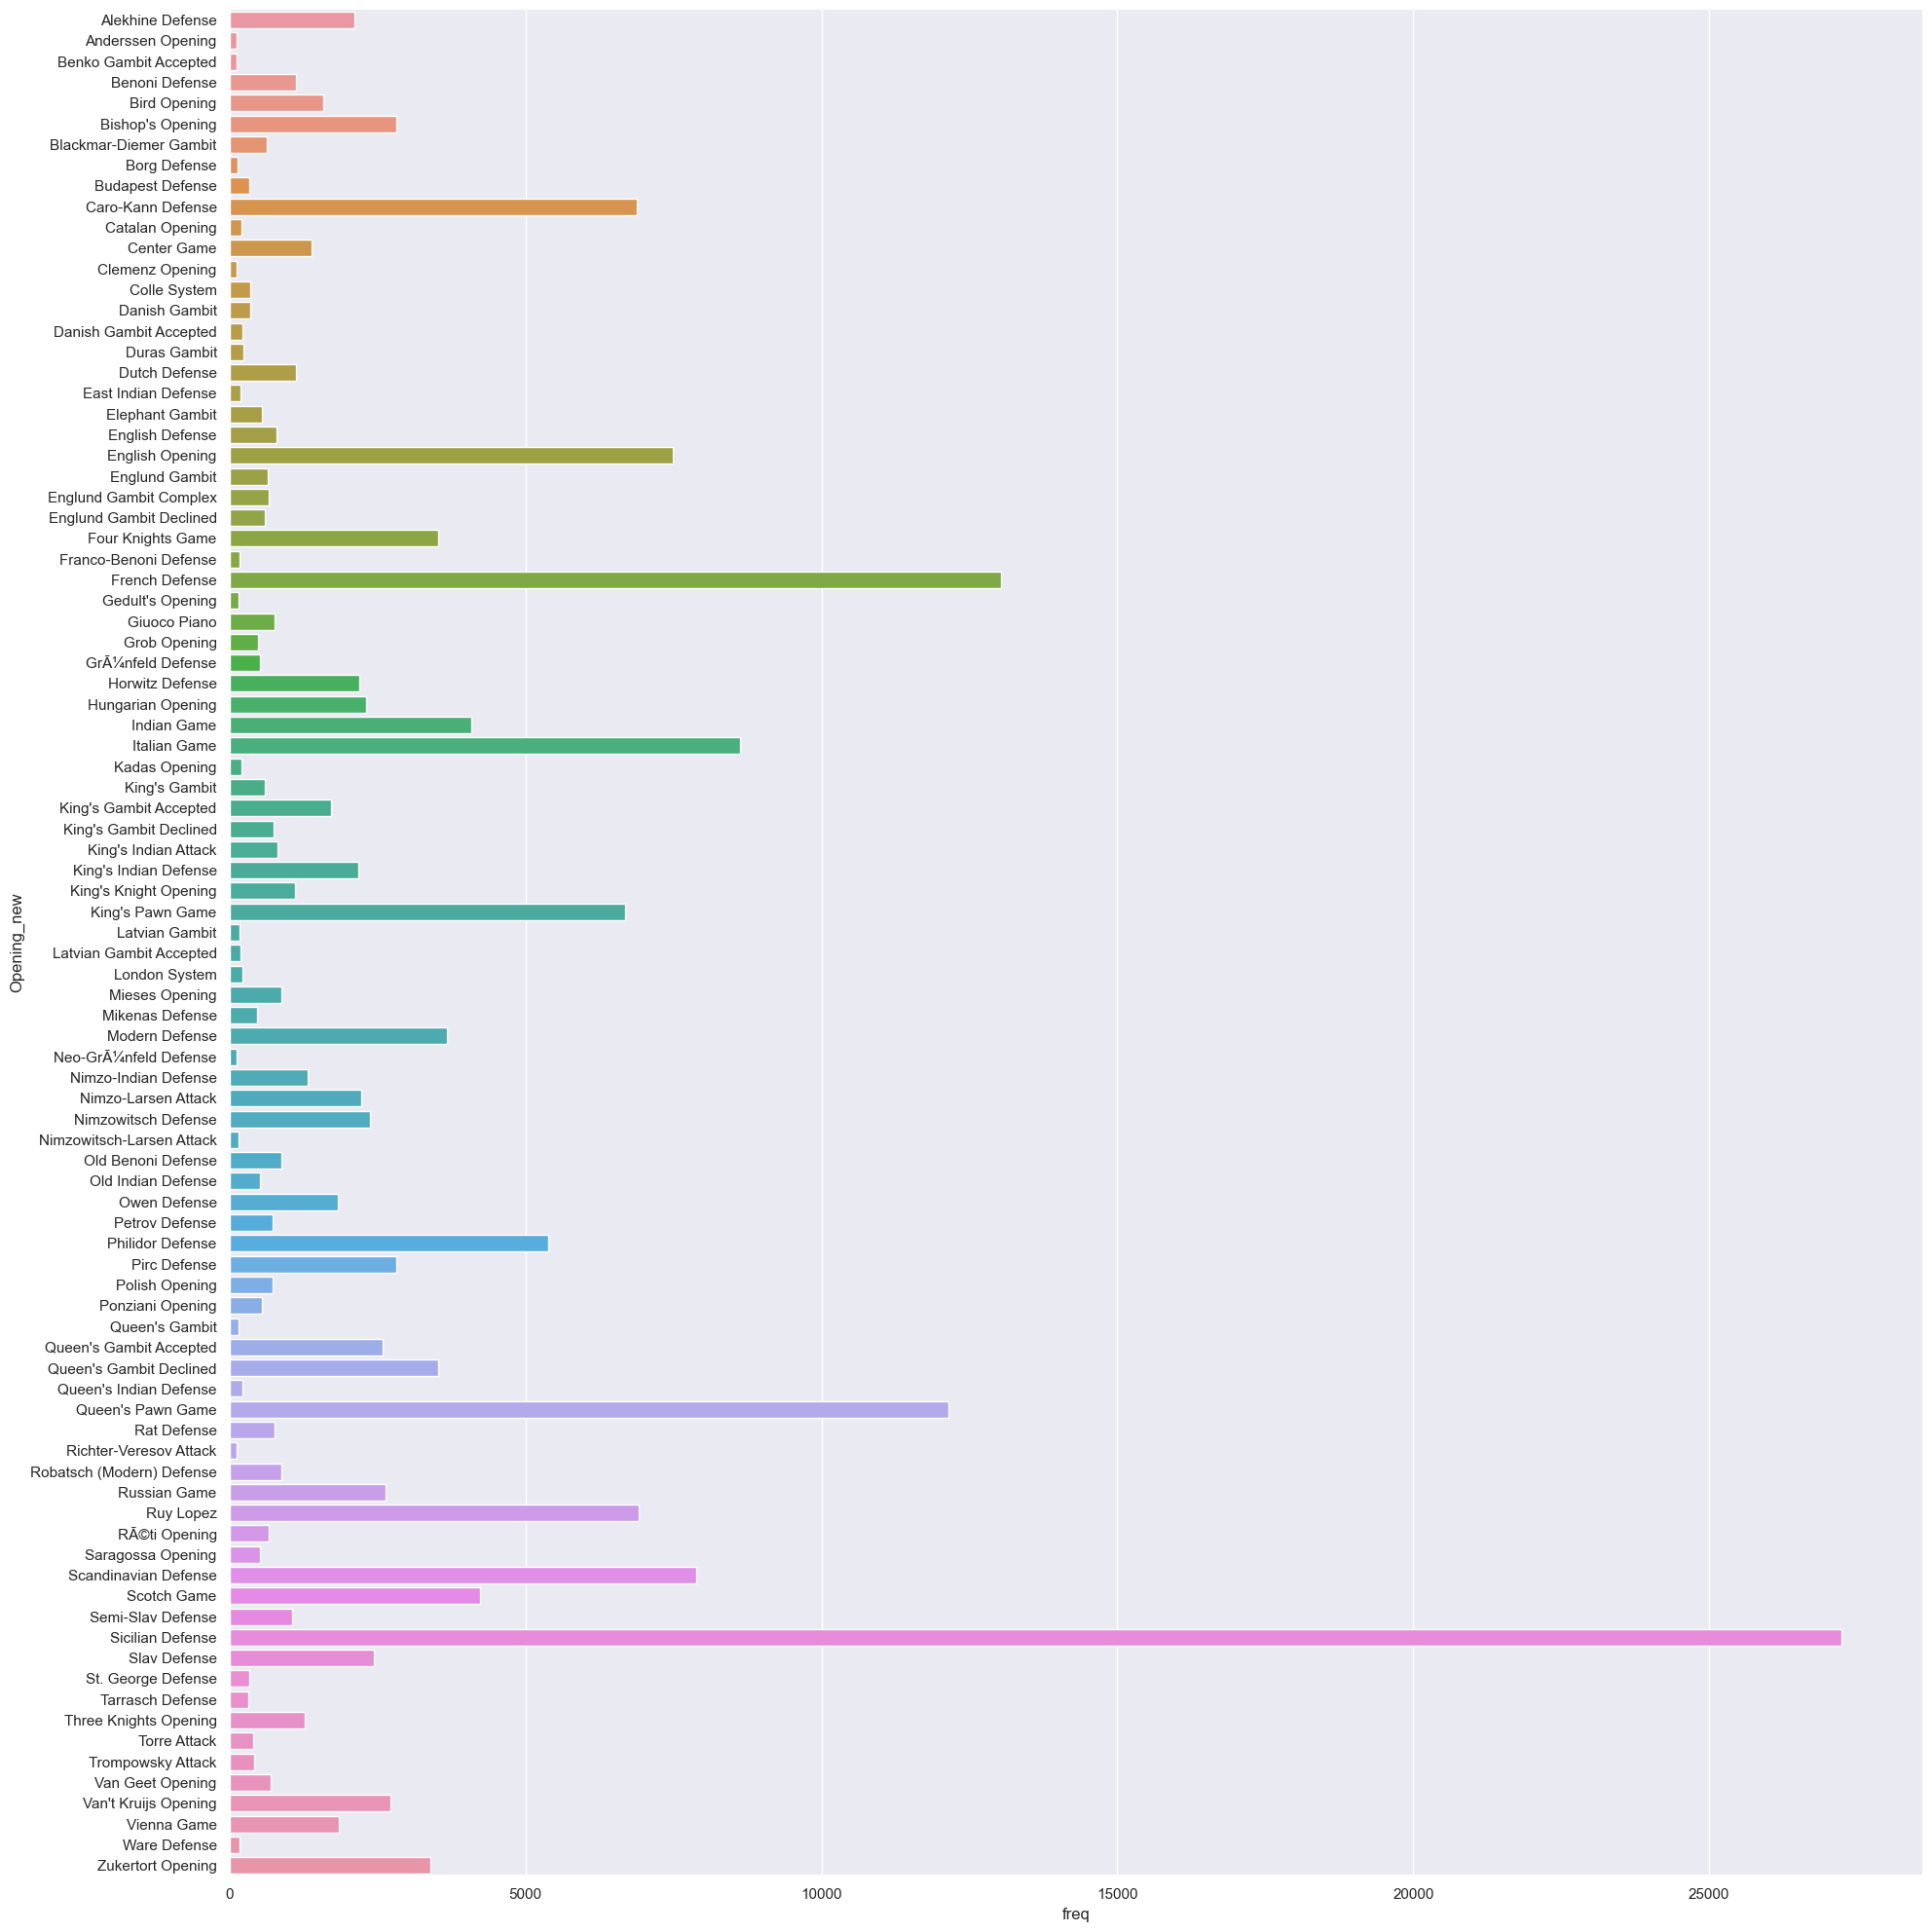

In [3]:
myorder=sorted(chessdata['Opening_new'].drop_duplicates())

sb.catplot(x= 'freq', y='Opening_new', data = chessdata, kind='bar',orient='h', height=20, aspect=1, order=myorder, errorbar=None)


In [4]:
freq_gen = chessdata
freq_gen['tot'] = freq_gen.groupby('Opening_new')['Opening_new'].transform('count')


# freq_gen['Opening_new'] = freq_gen['Opening_new'].drop_duplicates()
# freq_gen = freq_gen.dropna()
# frgeeq_n



In [5]:
temp = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp.loc[temp.Result == "0-1", 'Result'] = 0
temp.loc[temp.Result == "1-0", 'Result'] = 1
temp.loc[temp.Result == "1/2-1/2", 'Result'] = 0


temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')

temp['Opening_new'] = temp['Opening_new'].drop_duplicates()
temp = temp.dropna()

temp = temp.drop('Result', axis=1)
temp["win_rate"] = temp["win"].div(temp["tot"].values)

temp.sort_values(by=['win_rate'])


C:\Users\rinoa\AppData\Local\Temp\ipykernel_25348\2706443046.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['win'] = temp.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_25348\2706443046.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Opening_new'] = temp['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
3009,Queen's Indian Defense,12,2,0.166667
3,Richter-Veresov Attack,21,4,0.190476
949,Clemenz Opening,7,2,0.285714
864,East Indian Defense,19,6,0.315789
386,Van't Kruijs Opening,231,81,0.350649
...,...,...,...,...
127,Danish Gambit Accepted,29,19,0.655172
3283,London System,12,8,0.666667
1485,Nimzowitsch-Larsen Attack,6,4,0.666667
98,Rat Defense,76,52,0.684211


Win rate for white

In [6]:
temp = temp[temp['tot'] >100]
temp.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
386,Van't Kruijs Opening,231,81,0.350649
77,Hungarian Opening,185,67,0.362162
303,Nimzo-Larsen Attack,160,66,0.4125
26,Caro-Kann Defense,744,308,0.413978
38,Bishop's Opening,436,189,0.433486
48,Giuoco Piano,113,50,0.442478
7,Nimzo-Indian Defense,122,54,0.442623
128,Alekhine Defense,144,64,0.444444
41,Sicilian Defense,3156,1407,0.445817
136,King's Knight Opening,141,65,0.460993


Immediately we see, white performs very well in the Philidor Defense, Vienna Game, Zukertort Opening, Modern Defense and Semi-Slav Defense. The former, we mentioned in the BlitzMid dataset. We will take a closer look at these in the classification tree.

In [7]:
temp1 = freq_gen[['Opening_new', 'Result', 'tot']]

#convert the fucking strings to integers
temp1.loc[temp1.Result == "0-1", 'Result'] = 1
temp1.loc[temp1.Result == "1-0", 'Result'] = 0
temp1.loc[temp1.Result == "1/2-1/2", 'Result'] = 0


temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')

temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()
temp1 = temp1.dropna()

temp1 = temp1.drop('Result', axis=1)
temp1["win_rate"] = temp1["win"].div(temp1["tot"].values)

temp1.sort_values(by=['win_rate'])

C:\Users\rinoa\AppData\Local\Temp\ipykernel_25348\3596201361.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['win'] = temp1.groupby('Opening_new')['Result'].transform('sum')
C:\Users\rinoa\AppData\Local\Temp\ipykernel_25348\3596201361.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1['Opening_new'] = temp1['Opening_new'].drop_duplicates()


,Opening_new,tot,win,win_rate
17825,Gedult's Opening,1,0,0.0
1485,Nimzowitsch-Larsen Attack,6,1,0.166667
98,Rat Defense,76,20,0.263158
127,Danish Gambit Accepted,29,9,0.310345
319,Englund Gambit,47,15,0.319149
...,...,...,...,...
77,Hungarian Opening,185,118,0.637838
121,GrÃ¼nfeld Defense,37,24,0.648649
949,Clemenz Opening,7,5,0.714286
3,Richter-Veresov Attack,21,15,0.714286


Winrate for Black

In [8]:

temp1 = temp1[temp1['tot'] >100]
temp1.sort_values(by=['win_rate'])

,Opening_new,tot,win,win_rate
40,Philidor Defense,855,278,0.325146
42,Queen's Gambit Accepted,376,127,0.337766
51,King's Gambit Accepted,232,80,0.344828
75,Horwitz Defense,257,94,0.365759
6,Slav Defense,233,93,0.399142
312,Three Knights Opening,145,58,0.4
29,Scotch Game,594,241,0.405724
16,Queen's Gambit Declined,762,319,0.418635
1,Owen Defense,196,83,0.423469
4,Ruy Lopez,998,427,0.427856


Black does extremely well in the Van't Kruijs Opening, more than 5% points higher than the next best. We explained why in BlitzMid, and it is no suprise to see that a suboptimal first move suffers in the more competitive format.

In [9]:
# Import the encoder from sklearn
chessdata.loc[chessdata.Result == "0-1", 'Result'] = "-1" #black win
chessdata.loc[chessdata.Result == "1-0", 'Result'] = "1" #white win
chessdata.loc[chessdata.Result == "1/2-1/2", 'Result'] = "0" #draw
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
cat_predictors = chessdata[["Opening_new"]]

In [10]:
ohe.fit(cat_predictors)
predictors_cat_ohe = pd.DataFrame(ohe.transform(cat_predictors).toarray(), 
                                  columns=ohe.get_feature_names_out(cat_predictors.columns))

In [11]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

In [12]:
chessdata.info()
chessData_num = chessdata[['ELO Diff']]
chessData_res = chessdata['Result']
chessData_ohe = pd.concat([chessData_num, predictors_cat_ohe, chessData_res], 
                           sort = False, axis = 1).reindex(index=chessData_num.index)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22417 entries, 0 to 22416
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    22417 non-null  int64  
 1   BlackElo      22417 non-null  int64  
 2   ECO           22417 non-null  object 
 3   Event         22417 non-null  object 
 4   Opening       22417 non-null  object 
 5   Result        22417 non-null  object 
 6   Termination   22417 non-null  object 
 7   TimeControl   22417 non-null  object 
 8   WhiteElo      22417 non-null  int64  
 9   BlackTitle    3 non-null      object 
 10  WhiteTitle    0 non-null      float64
 11  Move_ply_200  20 non-null     object 
 12  Category      22417 non-null  object 
 13  Opening_new   22417 non-null  object 
 14  freq          22417 non-null  int64  
 15  ELO Diff      22417 non-null  int64  
 16  Ave ELO       22417 non-null  float64
 17  tot           22417 non-null  int64  
dtypes: float64(2), int64(6), o

In [13]:


# Extract Response and Predictors
y = pd.DataFrame(chessData_ohe['Result'])
X = pd.DataFrame(chessData_ohe.drop('Result', axis = 1))


# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 6) 
dectree.fit(X_train, y_train)                    # train the decision tree model

# Plot the trained Decision Tree


DecisionTreeClassifier(max_depth=6)

In [14]:
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

Train Data
Accuracy  :	 0.5600025492320438

Test Data
Accuracy  :	 0.5402914064823074



[Text(0.44037356321839083, 0.9285714285714286, 'ELO Diff <= -120.5\ngini = 0.525\nsamples = 15691\nvalue = [7405, 421, 7865]\nclass = White'),
 Text(0.1939655172413793, 0.7857142857142857, 'ELO Diff <= -242.5\ngini = 0.461\nsamples = 1404\nvalue = [929, 30, 445]\nclass = Black'),
 Text(0.09195402298850575, 0.6428571428571429, 'ELO Diff <= -553.0\ngini = 0.393\nsamples = 566\nvalue = [419, 10, 137]\nclass = Black'),
 Text(0.04597701149425287, 0.5, 'ELO Diff <= -970.5\ngini = 0.219\nsamples = 81\nvalue = [71, 1, 9]\nclass = Black'),
 Text(0.022988505747126436, 0.35714285714285715, 'ELO Diff <= -1092.0\ngini = 0.444\nsamples = 3\nvalue = [1, 0, 2]\nclass = White'),
 Text(0.011494252873563218, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = Black'),
 Text(0.034482758620689655, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = White'),
 Text(0.06896551724137931, 0.35714285714285715, 'Opening_new_Old Indian Defense <= 0.5\ngini = 0.186\nsampl

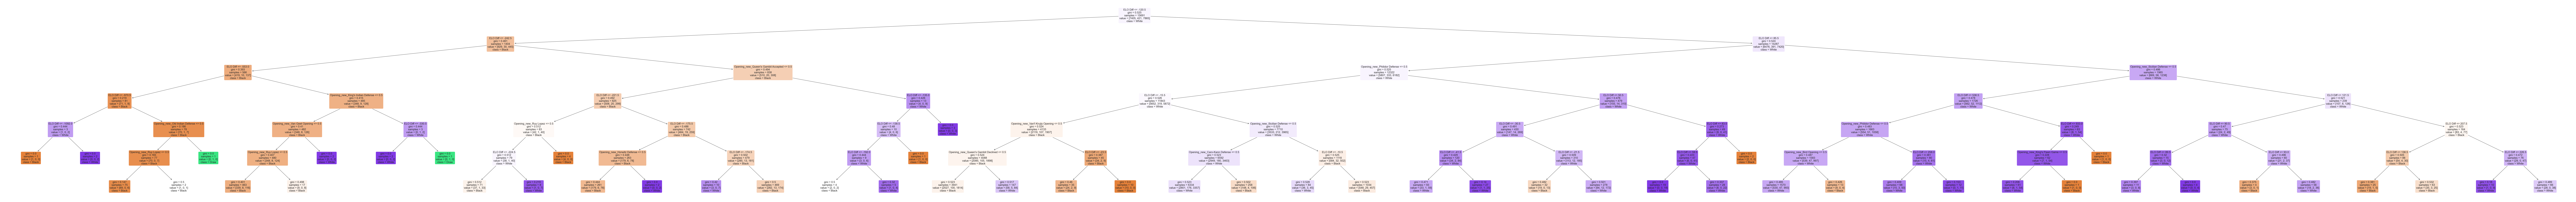

In [15]:
f = plt.figure(figsize=(256,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["Black","Draw","White"])

![The Philidor Defence](midphoto/left.png "Title")

![The Philidor Defence](midphoto/mid.png "Title")

![The Philidor Defence](midphoto/right.png "Title")